In [1]:
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
import base64
import folium
from folium.plugins import HeatMap
from streamlit_folium import st_folium

In [2]:
df = pd.read_csv('job_board.csv')

In [3]:
st.set_page_config(
    page_title="Ex-stream-ly Cool App",
    page_icon="🧊",
    layout="centered",
    initial_sidebar_state="expanded",
    menu_items={
        'Get Help': 'https://www.extremelycoolapp.com/help',
        'Report a bug': "https://www.extremelycoolapp.com/bug",
        'About': "# This is a header. This is an *extremely* cool app!"
    }
)

In [4]:
st.title('Web Scraped Job Board')

st.markdown("""
### This app displays web scraped data science,analysis and engineering jobs!
""")

2023-01-09 02:36:25.289 
  command:

    streamlit run C:\Users\aster\miniconda3\envs\job_board\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [5]:
# Sidebar Area

st.sidebar.header('User Input Features')

categories = st.sidebar.multiselect('Job Category', df.categories.unique(), df.categories.unique())

location = st.sidebar.multiselect('City', df.location.unique(), df.location.unique())

level = st.sidebar.multiselect('Experience Level', df.level.unique(), df.level.unique())

job_type = st.sidebar.multiselect('Job Type', df.job_type.unique(), df.job_type.unique())

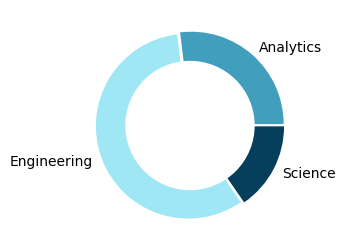

In [6]:
# Filtering data
df_selected_jobs = df[(df.categories.isin(categories))
                      & (df.location.isin(location)) & (df.level.isin(level)) &
                      (df.job_type.isin(job_type))].copy()

st.subheader('Display Selected Job(s)')
st.write('Data Dimension: ' + str(df_selected_jobs.shape[0]) + ' rows and ' +
         str(df_selected_jobs.shape[1]) + ' columns.')
st.dataframe(df_selected_jobs.iloc[:,:6])

# file download
def filedownload(df):
    csv = df.to_csv(index=False)
    b64 = base64.b64encode(csv.encode()).decode()  # strings <-> bytes conversions
    href = f'<a href="data:file/csv;base64,{b64}" download="df_selected_jobs.csv">Download CSV File</a>'
    return href

st.markdown(filedownload(df_selected_jobs), unsafe_allow_html=True)

# pie chart
plt.figure(figsize=(5,3))
plt.pie(x=df.groupby('categories').count()['company'],
        explode=(0.02, 0.02, 0.02), labels= df.groupby('categories').count()['company'].index, colors = ['#429EBD', '#9FE7F5','#053F5C'])

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
st.header('Stake of categories in Greek market')
st.pyplot(fig)

# map

st.header('The majority of the listings are in/near Athens')

map = folium.Map(location=[37.983810, 23.727539], zoom_start=5, scrollWheelZoom=False, tiles='CartoDB positron')

data = df[['latitude','longitude']].dropna().to_numpy().tolist()

HeatMap(data = data).add_to(map)

st_map = st_folium(map, width=700, height=450)